# imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# read

In [2]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston = load_boston()

df = pd.DataFrame(
    boston['data'], 
    columns=boston['feature_names']
)
df['target'] = boston['target']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


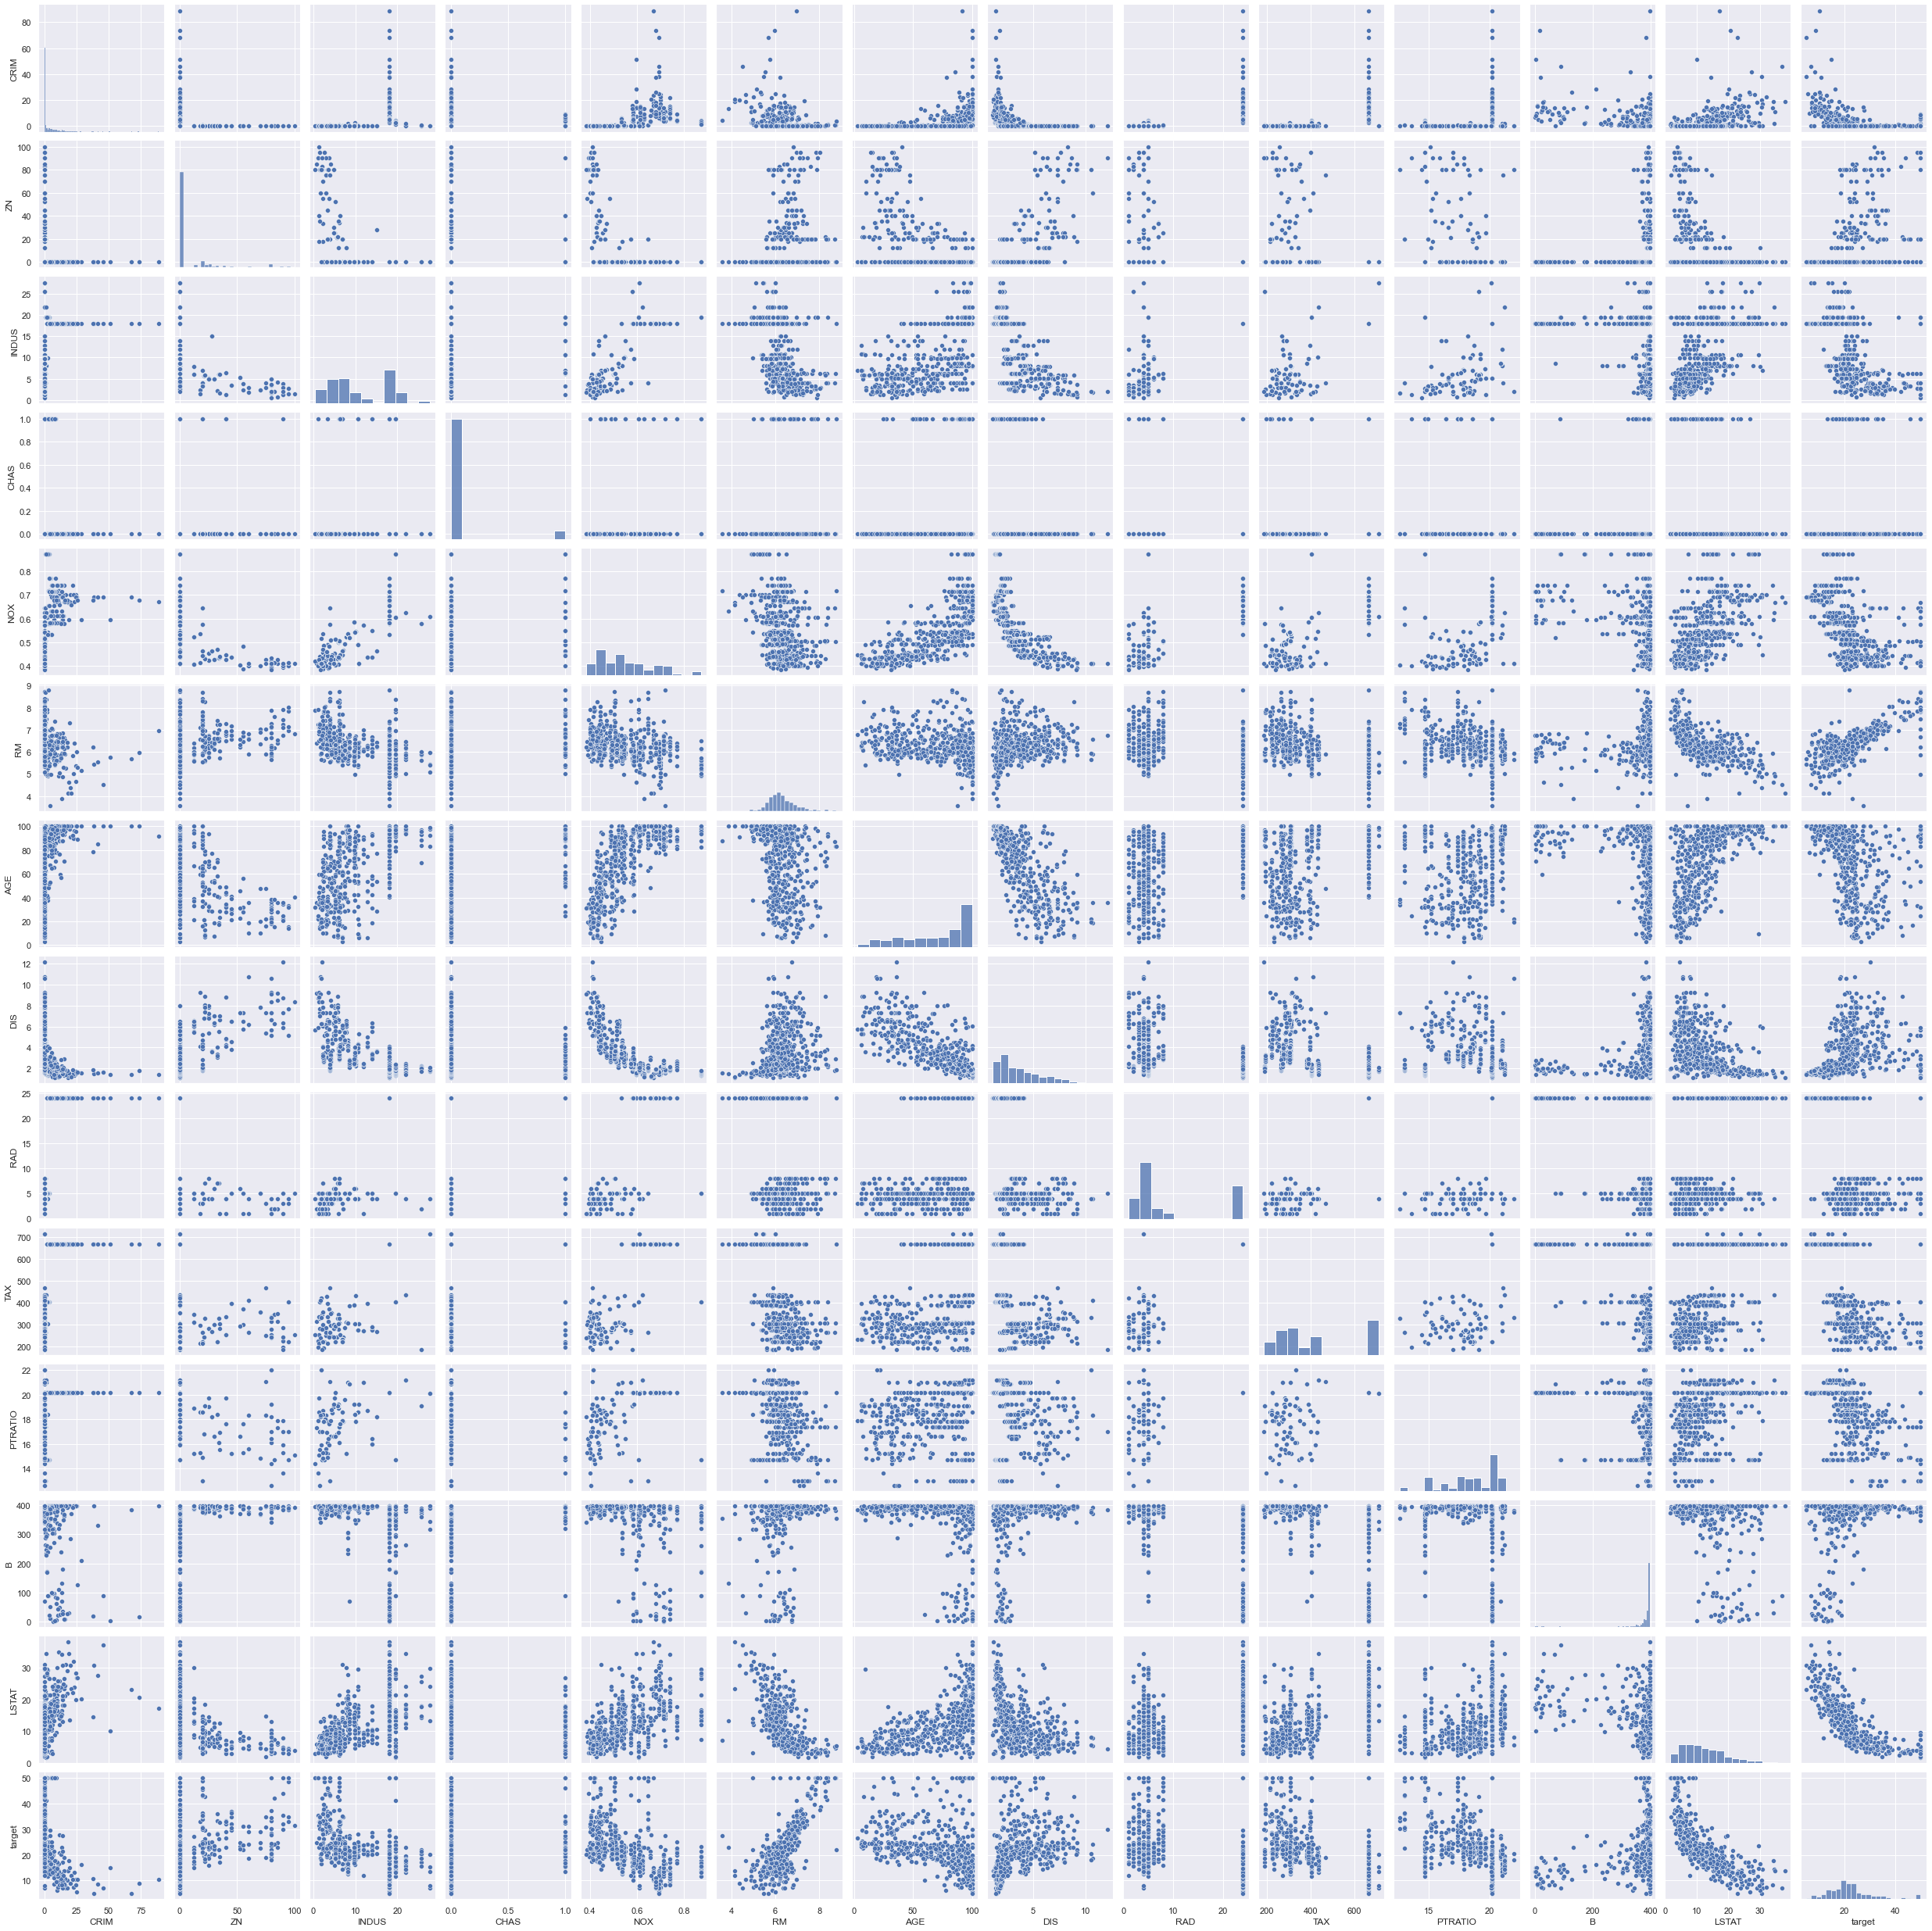

In [6]:
sns.pairplot(data=df)

In [7]:
np.random.seed(0)
tf.random.set_seed(0)

In [8]:
y = df['target']
X = df.drop('target', axis=1)
y.shape, X.shape

((506,), (506, 13))

# model

In [9]:
model = Sequential()

model.add(Dense(units=16, input_dim=13, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=1)) # reg output layer

model.compile(
    loss=tf.keras.losses.MSE, optimizer=tf.keras.optimizers.Adam(), 
    # metrics=[tf.keras.metrics.MSE]
)   # loss에 MSE가 있으므로, metrics에 할당하지 않아도 됨

# callbacks

In [10]:
model_path = './saved_model/{epoch:03d}_{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_weights_only=True, save_best_only=True, save_freq='epoch')
stopping   = EarlyStopping(monitor='val_loss', patience=100)

# before engineering

In [11]:
history = model.fit(
    X, y, 
    epochs=1000, 
    verbose=1, 
    callbacks=[stopping, checkpoint], 
    validation_split=0.2, 
    shuffle=True
)

Epoch 1/1000
13/13 [==============================] - 1s 22ms/step - loss: 670.2625 - val_loss: 278.8242
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 652.6404 - val_loss: 256.2461
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 535.3884 - val_loss: 77.7453
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 153.9309 - val_loss: 82.0351
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 111.0541 - val_loss: 35.4920
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 86.7377 - val_loss: 36.6304
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 80.9472 - val_loss: 44.0668
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 78.6187 - val_loss: 27.4194
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 77.2669 - val_loss: 20.7464
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss:

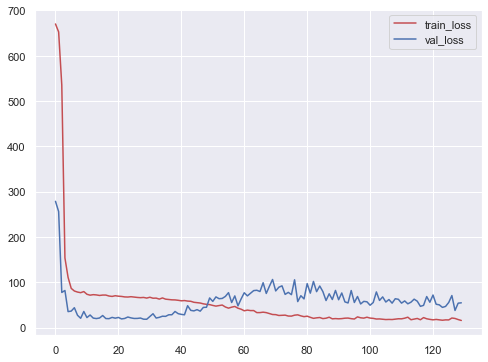

In [12]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

f = plt.subplots(figsize=(8, 6))
plt.plot(np.arange(len(train_loss)), train_loss, c='r', label='train_loss')
plt.plot(np.arange(len(train_loss)), val_loss, c='b', label='val_loss',)
plt.legend(); plt.show()

# after engineering

## outlier

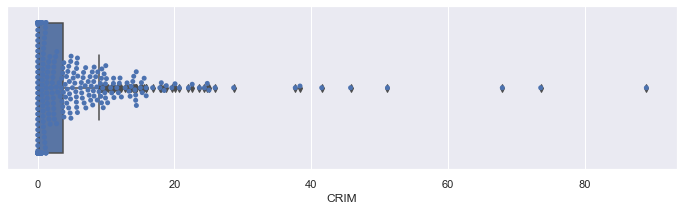

In [13]:
f, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x=df['CRIM'])
sns.swarmplot(x=df['CRIM'])
plt.show()

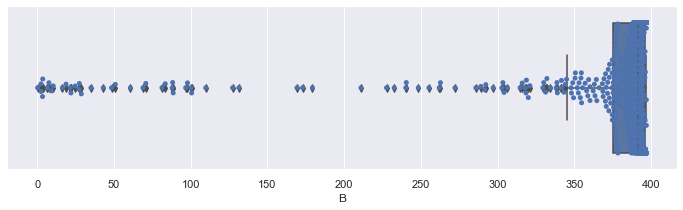

In [14]:
f, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x=df['B'])
sns.swarmplot(x=df['B'])
plt.show()

In [15]:
crim_idx = df[df['CRIM'] > 60].index.tolist()
b_idx    = df[df['B'] < 150].index.tolist()

In [16]:
idx = list(set(crim_idx + b_idx))

In [17]:
df.drop(index=idx, axis=0, inplace=True)

In [18]:
df.shape

(468, 14)

<AxesSubplot:>

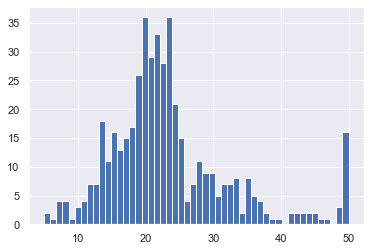

In [19]:
df['target'].hist(bins=50)

In [20]:
df['target'] = np.log(df['target'])

<AxesSubplot:>

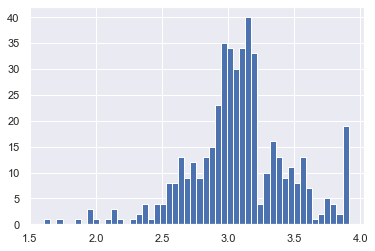

In [21]:
df['target'].hist(bins=50)

In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler

X_col = df.columns.to_list()
X_col.remove('target')

rb = RobustScaler()
df[X_col] = rb.fit_transform(df[X_col])

In [23]:
y = df['target']
X = df.drop('target', axis=1)

In [24]:
model = Sequential()

model.add(Dense(units=16, input_dim=13, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=14, activation=tf.keras.activations.relu))
model.add(Dense(units=1)) # reg output layer

model.compile(
    loss=tf.keras.losses.MSE, optimizer=tf.keras.optimizers.Adam(), 
    # metrics=[tf.keras.metrics.MSE]
)   # loss에 MSE가 있으므로, metrics에 할당하지 않아도 됨

In [25]:
model_path = './saved_model/{epoch:03d}_{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_weights_only=True, save_best_only=True, save_freq='epoch')
stopping   = EarlyStopping(monitor='val_loss', patience=100)

In [26]:
pd.dddhistory = model.fit(
    X, y, 
    epochs=1000, 
    verbose=1, 
    callbacks=[stopping, checkpoint], 
    validation_split=0.2, 
    shuffle=True
)

Epoch 1/1000
12/12 [==============================] - 1s 19ms/step - loss: 9.9869 - val_loss: 7.1121
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 9.4423 - val_loss: 6.5477
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.6544 - val_loss: 5.6969
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 7.3561 - val_loss: 4.2065
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.9092 - val_loss: 1.2447
Epoch 6/1000
12/12 [==============================] - 0s 10ms/step - loss: 1.2652 - val_loss: 5.9198
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.4138 - val_loss: 0.9668
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.1910 - val_loss: 0.7598
Epoch 9/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1257 - val_loss: 0.8363
Epoch 10/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1086 - val_loss: 0.56

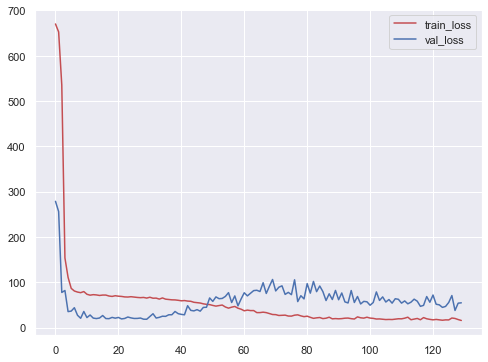

In [27]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

f = plt.subplots(figsize=(8, 6))
plt.plot(np.arange(len(train_loss)), train_loss, c='r', label='train_loss')
plt.plot(np.arange(len(train_loss)), val_loss, c='b', label='val_loss',)
plt.legend(); plt.show()